# Import

In [1]:
# Toy data 생성 및 시각화를 위한 라이브러리
import pandas as pd
import seaborn as sns
import torch
import random
import numpy as np
from torch.distributions.normal import Normal
import torch
from sklearn.preprocessing import MinMaxScaler
from torch import nn, optim  
from torch.utils.data import DataLoader, Dataset      # 데이터를 모델에 사용할 수 있게 정리해주는 라이브러리.
import torch.nn.functional as F  
import numpy as np
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import copy
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from random import randint   
from torch.utils.data import RandomSampler
from cdd import CDD

# DATA

In [2]:
import random
bn = 9
df_s =pd.read_csv("df_s_se.csv")
df_t =pd.read_csv("df_t_se.csv")
df_s_true =pd.read_csv("df_s_true_se.csv")
df_t_true =pd.read_csv("df_t_true_se.csv")
df_t_labeled =pd.read_csv("df_t_labeled_se.csv")

x_s = np.array(df_s['X']).tolist()
x_t = np.array(df_t['X']).tolist()
x_t_labeled = np.array(df_t_labeled['X']).tolist()
y_s = np.array(df_s['Y']).tolist()
y_t = np.array(df_t['Y']).tolist()
y_t_labeled = np.array(df_t_labeled['Y']).tolist()
y_s_true = np.array(df_s_true['Y']).tolist()
y_t_true = np.array(df_t_true['Y']).tolist()

<Axes: xlabel='X', ylabel='Y'>

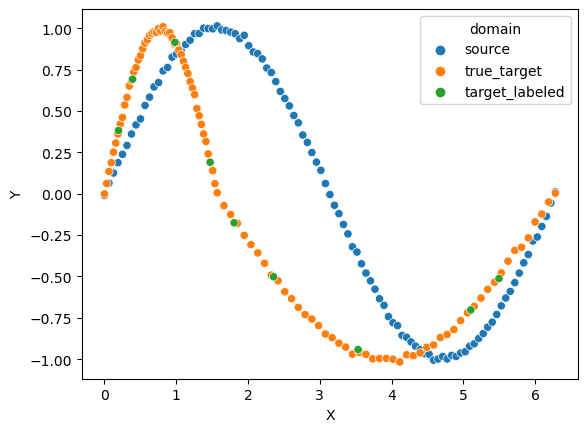

In [3]:
data_s = [[x_s[i],y_s[i],'source'] for i in range(len(x_s))]
df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])


data_s_true = [[x_s[i],y_s_true[i],'source'] for i in range(len(x_s))]
df_s_true = pd.DataFrame(data_s_true, columns=['X','Y','domain'])
df_s_true = df_s_true.sort_values('X')

data_t = [[x_t[i],y_t[i],'true_target'] for i in range(len(x_t))]
df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])

data_t_true = [[x_t[i],y_t_true[i],'true_target'] for i in range(len(x_t))]
df_t_true = pd.DataFrame(data_t_true, columns=['X','Y','domain'])

df_t_true = df_t_true.sort_values('X')
data_t_labeled = [[x_t_labeled[i],y_t_labeled[i],'target_labeled'] for i in range(len(x_t_labeled))]
df_t_labeled = pd.DataFrame(data_t_labeled, columns=['X','Y','domain'])

sns.scatterplot(data=pd.concat([df_s, df_t, df_t_labeled]), x= 'X', y='Y', hue='domain')

In [4]:
x_s = torch.tensor(x_s).reshape(-1,1).type(torch.float32)
x_t =torch.tensor(x_t).reshape(-1,1).type(torch.float32)
x_t_labeled =torch.tensor(x_t_labeled).reshape(-1,1).type(torch.float32)

In [5]:
y_s = torch.tensor(y_s).reshape(-1,1).type(torch.float32)
y_t =torch.tensor(y_t).reshape(-1,1).type(torch.float32)
y_t_labeled =torch.tensor(y_t_labeled).reshape(-1,1).type(torch.float32)
y_s_true = torch.tensor(y_s_true).reshape(-1,1).type(torch.float32)
y_t_true =torch.tensor(y_t_true).reshape(-1,1).type(torch.float32)

# Model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(1, 256)
        self.relu = nn.ReLU()
        self.h2 = nn.Linear(256, 256)
        self.h3 = nn.Linear(256, 256)
        self.h4 = nn.Linear(256,10)
        self.reg = nn.Linear(10, 1)
        self.drop1 = nn.Dropout()
        self.drop2 = nn.Dropout()
        
        
        
    def forward(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.drop1(h1_x)
        h1_x = self.h4(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.drop2(h1_x)
        h1_x = self.reg(h1_x)

        return h1_x
    
    def output(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h4(h1_x)
        f_x = self.relu(h1_x)
        y_hat = self.reg(h1_x)
        return {'f_x':f_x, 'output':y_hat}


# Pretrained Regressor

In [7]:
# model = Net()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# best_loss = 1000
# for epoch in range(10000):
#     optimizer.zero_grad()

#     model_output_s = model.output(x_s)
#     latent_x_s = model_output_s['f_x']
#     y_s_hat = model_output_s['output']



#     # mse loss
#     y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
#     y_s_mse.backward()
#     if epoch % 100 == 0:
#         print(f"Epoch : {epoch}, total_loss = {y_s_mse}")
#     optimizer.step()
#     val_loss = torch.nn.functional.mse_loss(y_s_hat, y_s_true)
#     if best_loss > val_loss:
#         best_loss = val_loss
#         best_model = copy.deepcopy(model)
#         print(f"Saving... val mse{val_loss}")
   
    

Epoch : 0, total_loss = 0.5120865702629089
Saving... val mse0.5140060186386108
Saving... val mse0.49711185693740845
Saving... val mse0.39503830671310425
Saving... val mse0.3161790370941162
Saving... val mse0.2787207365036011
Saving... val mse0.2506043314933777
Saving... val mse0.20266646146774292
Saving... val mse0.20035289227962494
Saving... val mse0.16457125544548035
Saving... val mse0.15273809432983398
Saving... val mse0.15231892466545105
Saving... val mse0.15120665729045868
Saving... val mse0.13888797163963318
Saving... val mse0.1260850578546524
Saving... val mse0.1240672841668129
Saving... val mse0.11560207605361938
Saving... val mse0.10666493326425552
Saving... val mse0.10603580623865128
Saving... val mse0.09830491989850998
Saving... val mse0.09696539491415024
Saving... val mse0.09465312212705612
Saving... val mse0.08905075490474701
Saving... val mse0.08846311271190643
Saving... val mse0.08389031887054443
Saving... val mse0.08066969364881516
Saving... val mse0.07886600494384766
S

In [20]:
# torch.save(best_model, "./best_pretrained_model_se.pt")

# Domain Shift -> performance effect

In [7]:
model = torch.load("./best_pretrained_model_se.pt")
model_output_s = model.output(x_s)
latent_x_s = model_output_s['f_x']
y_s_hat = model_output_s['output']

model_output_t_labeled = model.output(x_t_labeled)
latent_x_t_labeled = model_output_t_labeled['f_x']
y_t_labeled_hat = model_output_t_labeled['output']

model_output_t = model.output(x_t)
latent_x_t = model_output_t['f_x']
y_t_hat = model_output_t['output']

# mse loss
y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s_true)
y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t_true)

print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")

source mse : 3.473570541245863e-05, labeled target mse : 0.4410270154476166, target mse : 0.31902000308036804


<Axes: xlabel='X', ylabel='Y'>

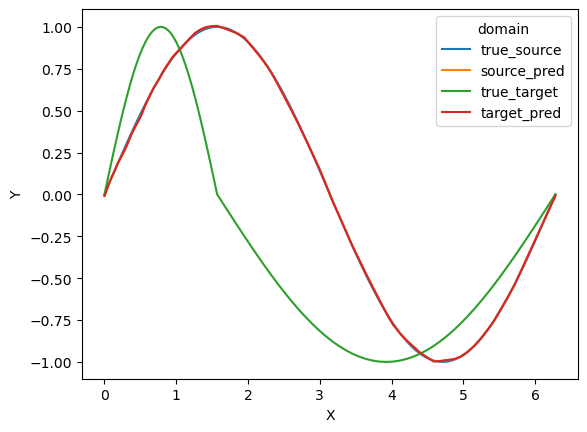

In [8]:
import seaborn as sns
data_s = [[x_s[i].item(),y_s_true[i].item(),'true_source'] for i in range(len(x_s))]
df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
df_s = df_s.sort_values('X')
data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
df_s_hat = df_s_hat.sort_values('X')

data_t = [[x_t[i].item(),y_t_true[i].item(),'true_target'] for i in range(len(x_t))]
df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
df_t = df_t.sort_values('X')
data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
df_t_hat = df_t_hat.sort_values('X')

df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

# Mapper

In [9]:
class Mapper(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(1, 16)
        self.relu = nn.ReLU()
        self.h2 = nn.Linear(16, 16)
        self.h3 = nn.Linear(16, 16)
        self.reg = nn.Linear(16, 1)
        
        
        
        
    def forward(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.reg(h1_x)


        return h1_x
    
    def output(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        f_x = self.relu(h1_x)
        y_hat = self.reg(h1_x)
        return {'f_x':f_x, 'output':y_hat}


In [11]:
# list_k = [1,2,3,4,5,6,7,8,9,10]
# for epsilon_k in list_k:
#     mapper = Mapper()
#     optimizer = optim.Adam(mapper.parameters(), lr=0.0001)
#     best_mapper = copy.deepcopy(mapper)
#     best_loss = 1000
#     loss_list = []
#     for epoch in range(20000):
#         optimizer.zero_grad()

#         latent_x_s = x_s
        
#         mapper_output_t_labeled = mapper.output(x_t_labeled)
#         latent_x_t_labeled = mapper_output_t_labeled['output']
        
        
#         # source latent에서 batch 추출
#         batch_latent_x_s_index = torch.randperm(latent_x_s.size(0))[:bn]
#         batch_latent_x_s = latent_x_s[batch_latent_x_s_index]


#         # cdd loss
#         feats_toalign_S = [batch_latent_x_s, torch.tensor([1]).repeat(len(batch_latent_x_s),1)]
#         feats_toalign_T = [latent_x_t_labeled, torch.tensor([1]).repeat(len(latent_x_t_labeled),1)]
#         cdd = CDD(kernel_num=(10,10), kernel_mul=(2,2), num_layers=2, num_classes=1, intra_only=True)
#         cdd_loss = cdd.forward(feats_toalign_S, feats_toalign_T, [bn], [bn])['cdd']

#         # ns loss
#         epsilon_k = epsilon_k

#         f_s_vector = latent_x_s
#         f_t_vector = latent_x_t_labeled

#         from sklearn.neighbors import KNeighborsRegressor
#         knn = KNeighborsRegressor(n_neighbors=epsilon_k)
#         knn.fit(y_s, np.array(range(len(y_s))))
#         total_ns_loss = 0
#         for i in range(bn):
#             best_dist = 1000
#             error = 0
#             neighbors = knn.kneighbors(y_t_labeled[i].reshape(-1,1))[1][0].tolist()
#             for index_i in neighbors:
#                 temp_f_dist = torch.abs(f_t_vector[i] - f_s_vector[index_i]).norm()
#                 temp_y_dist = torch.abs(y_t_labeled[i] - y_s[index_i]).norm()
#                 if best_dist > temp_f_dist + temp_y_dist:
#                     best_dist = temp_f_dist + temp_y_dist
#                     error = temp_f_dist
#             total_ns_loss += error
#         ns_loss = total_ns_loss / bn

#         total_loss = cdd_loss + ns_loss
        
#         if best_loss > total_loss:
#             best_loss = total_loss
#             best_mapper = copy.deepcopy(mapper)
#         total_loss.backward()

#         loss_list.append(total_loss.item())
#         if epoch % 100 == 0:
#             print(f"Epoch : {epoch}, total_loss = {np.mean(np.array(loss_list))}")
#             loss_list = []
#         optimizer.step()

#     torch.save(best_mapper, f"./best_mapper_se_{epsilon_k}.pt")

Epoch : 0, total_loss = 9.379436492919922
Epoch : 100, total_loss = 9.697553248405457
Epoch : 200, total_loss = 8.99921223640442
Epoch : 300, total_loss = 7.333575572967529
Epoch : 400, total_loss = 5.843245143890381
Epoch : 500, total_loss = 4.358368980884552
Epoch : 600, total_loss = 2.9584052848815916
Epoch : 700, total_loss = 2.2000598299503324
Epoch : 800, total_loss = 1.8265763342380523
Epoch : 900, total_loss = 1.6869520080089568
Epoch : 1000, total_loss = 1.7827903831005096
Epoch : 1100, total_loss = 1.7252498292922973
Epoch : 1200, total_loss = 1.6954831278324127
Epoch : 1300, total_loss = 1.6820770573616028
Epoch : 1400, total_loss = 1.668009113073349
Epoch : 1500, total_loss = 1.701667239665985
Epoch : 1600, total_loss = 1.6057938969135284
Epoch : 1700, total_loss = 1.5553793489933014
Epoch : 1800, total_loss = 1.5974151480197907
Epoch : 1900, total_loss = 1.6028975141048432
Epoch : 2000, total_loss = 1.6005858635902406
Epoch : 2100, total_loss = 1.500005946159363
Epoch : 22

# Domain Adaptation -> Performance

In [10]:
source_mse, labeled_target_mse, target_mse, source_r2, target_r2 = [],[],[],[],[]
for i in range(1,11):
    best_mapper = torch.load(f"./best_mapper_se_{i}.pt")

    model_output_s = model.output(x_s)
    latent_x_s = model_output_s['f_x']
    y_s_hat = model_output_s['output']

    f_t_labeled = best_mapper.output(x_t_labeled)['output']
    model_output_t_labeled = model.output(f_t_labeled)
    latent_x_t_labeled = model_output_t_labeled['f_x']
    y_t_labeled_hat = model_output_t_labeled['output']

    f_t = best_mapper.output(x_t)['output']
    model_output_t = model.output(f_t)
    latent_x_t = model_output_t['f_x']
    y_t_hat = model_output_t['output']

    # mse loss
    y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s_true)
    y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
    y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t_true)

    from torcheval.metrics import R2Score
    metric = R2Score()
    metric.update(y_s_hat, y_s_true)
    y_s_r2 = metric.compute()

    metric = R2Score()
    metric.update(y_t_hat, y_t_true)
    y_t_r2 = metric.compute()

    print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")
    print(f"source r2 : {y_s_r2}, target r2 : {y_t_r2}")

    source_mse.append(y_s_mse)
    labeled_target_mse.append(y_t_mse)
    target_mse.append(y_t_real_mse)
    source_r2.append(y_s_r2)
    target_r2.append(y_t_r2)

source mse : 3.473570541245863e-05, labeled target mse : 0.02314271405339241, target mse : 0.01785760559141636
source r2 : 0.9999298453330994, target r2 : 0.9639276266098022
source mse : 3.473570541245863e-05, labeled target mse : 0.006280397996306419, target mse : 0.008570871315896511
source r2 : 0.9999298453330994, target r2 : 0.9826868176460266
source mse : 3.473570541245863e-05, labeled target mse : 0.002042558044195175, target mse : 0.0037127130199223757
source r2 : 0.9999298453330994, target r2 : 0.9925003051757812
source mse : 3.473570541245863e-05, labeled target mse : 0.0032656609546393156, target mse : 0.004044414963573217
source r2 : 0.9999298453330994, target r2 : 0.9918302893638611
source mse : 3.473570541245863e-05, labeled target mse : 0.003577428637072444, target mse : 0.004179434385150671
source r2 : 0.9999298453330994, target r2 : 0.9915575385093689
source mse : 3.473570541245863e-05, labeled target mse : 0.0033170655369758606, target mse : 0.003956493455916643
source

,k,target MSE
0,1,0.017858
1,2,0.008571
2,3,0.003713
3,4,0.004044
4,5,0.004179
5,6,0.003956
6,7,0.004677
7,8,0.002872
8,9,0.002791
9,10,0.003645


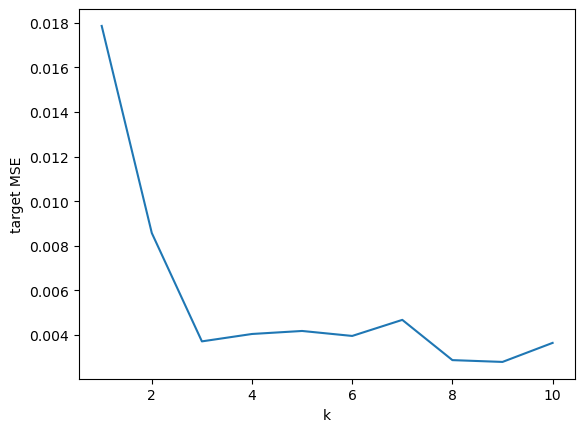

In [13]:
list_mse = []
for i in range(10):
    list_mse.append(target_mse[i].item())

k = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
df_mse = pd.concat([k,pd.DataFrame(list_mse)],axis=1,ignore_index=True)
df_mse.rename({0:'k',1:'target MSE'},axis=1,inplace=True)

sns.lineplot(data=df_mse, x = 'k',y= 'target MSE')
df_mse

In [12]:
df_mse.to_csv("./epsilon k small error.csv",index=False)

In [14]:
# import seaborn as sns
# data_s = [[x_s[i].item(),y_s_true[i].item(),'true_source'] for i in range(len(x_s))]
# df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
# df_s = df_s.sort_values('X')
# data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
# df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
# df_s_hat = df_s_hat.sort_values('X')

# data_t = [[x_t[i].item(),y_t_true[i].item(),'true_target'] for i in range(len(x_t))]
# df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
# df_t = df_t.sort_values('X')
# data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
# df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
# df_t_hat = df_t_hat.sort_values('X')

# df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
# sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

In [15]:
# model_output_s = model.output(x_s)
# latent_x_s = model_output_s['f_x']
# y_s_hat = model_output_s['output']

# f_t_labeled = mapper.output(x_t_labeled)['output']
# model_output_t_labeled = model.output(f_t_labeled)
# latent_x_t_labeled = model_output_t_labeled['f_x']
# y_t_labeled_hat = model_output_t_labeled['output']

# f_t = mapper.output(x_t)['output']
# model_output_t = model.output(f_t)
# latent_x_t = model_output_t['f_x']
# y_t_hat = model_output_t['output']

# # mse loss
# y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
# y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
# y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t)

# from torcheval.metrics import R2Score
# metric = R2Score()
# metric.update(y_s_hat, y_s_true)
# y_s_r2 = metric.compute()

# metric = R2Score()
# metric.update(y_t_hat, y_t_true)
# y_t_r2 = metric.compute()

# print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")
# print(f"source r2 : {y_s_r2}, target r2 : {y_t_r2}")

In [16]:
# import seaborn as sns
# data_s = [[x_s[i].item(),y_s_true[i].item(),'true_source'] for i in range(len(x_s))]
# df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
# df_s = df_s.sort_values('X')
# data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
# df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
# df_s_hat = df_s_hat.sort_values('X')

# data_t = [[x_t[i].item(),y_t_true[i].item(),'true_target'] for i in range(len(x_t))]
# df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
# df_t = df_t.sort_values('X')
# data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
# df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
# df_t_hat = df_t_hat.sort_values('X')

# df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
# sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

In [17]:
# 1% MMD + NS (Mapper 3구간 1점)
# 3.3% MMD + NS (Mapper 3구간)
# 3.3% 5*MMD + NS [BEST] (Mapper 3구간 MMD5배)
# 3.3% NS (Mapper 3구간 NS만)
# 3.3% MMD (Mapper 3구간 MMD만)
# 6.6% MMD + NS (Mapper 3구간 6점6)
# 3.3% Shared(MMD+NS+MSE) (Shared_30)
# 3.3%(True Target X -> 15, 10, 5) MMD+NS (Mapper 3구간 분포변화)
# 3.3%(True Target X -> 15, 10, 5) 5*MMD+NS (Mapper 3구간 분포변화 MMD5배)
# 3.3%(True Target X -> 15, 10, 5) 1/2*MMD+NS [NOT BAD] (Mapper 3구간 분포변화 MMD반)

# NS만 하거나 MMD만 하는 것보단, 둘다 하는 것이 좋다

# Sample Target ~~ True Target => MMD의 계수 높일수록 좋고
# Sample Target ~!~ True Target => MMD의 계수를 낮출수록 좋다 

In [18]:
print("0929 16:00 현재 시각 ? 끝까지 다 돌림 !")

0929 16:00 현재 시각 ? 끝까지 다 돌림 !
